# The idea of permutation

The idea of permutation is fundamental to a wide range of statistical tests.
This page shows how permutation works by comparing to a physical
implementation of permutation, that randomizes values by mixing balls in a
bucket.

## A mosquito problem

![]({{ site.baseurl }}/images/mosquito_banner.png)

With thanks to John Rauser: [Statistics Without the Agonizing Pain](https://www.youtube.com/watch?v=5Dnw46eC-0o)

## The data

Download the data from [mosquito_beer.csv]({{ site.baseurl
}}/data/mosquito_beer.csv).

See [this
page](https://github.com/matthew-brett/datasets/tree/master/mosquito_beer) for
more details on the dataset, and [the data license page]({{ site.baseurl
}}/data/license).


In [1]:
# Import Numpy library, rename as "np"
import numpy as np
# Import Pandas library, rename as "pd"
import pandas as pd

# Set up plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
# HIDDEN
# An extra tweak to make sure we always get the same random numbers.
# Do not use this in your own code; you nearly always want an unpredictable
# stream of random numbers.  Making them predictable in this way only makes
# sense for a very limited range of things, like tutorials and tests.
np.random.seed(42)

Read in the data:

In [3]:
mosquitoes = pd.read_csv('mosquito_beer.csv')
mosquitoes.head()

,volunteer,group,test,nb_released,no_odour,volunt_odour,activated,co2no,co2od,temp,trapside,datetime
0,subj1,beer,before,50,7,9,16,305.0,321.0,36.1,A,2007-08-28 19:00:00
1,subj2,beer,before,50,26,7,33,338.0,720.0,35.3,B,2007-08-28 21:00:00
2,subj3,beer,before,50,5,10,15,348.0,355.0,36.1,B,2007-09-15 19:00:00
3,subj4,beer,before,50,3,7,10,349.0,437.0,35.6,A,2007-09-25 17:00:00
4,subj5,beer,before,50,2,8,10,396.0,475.0,37.0,B,2007-09-25 18:00:00


Filter the data frame to contain only the "after" treatment rows:

In [4]:
# After treatment rows.
afters = mosquitoes[mosquitoes['test'] == 'after']

Filter the "after" rows to contain only the "beer" group, and get the number of activated mosquitoes for these 25 subjects:

In [5]:
# After beer treatment rows.
beers = afters[afters['group'] == 'beer']
# The 'activated' numbers for the after beer rows.
beer_activated = np.array(beers['activated'])
beer_activated

array([14, 33, 27, 11, 12, 27, 26, 25, 27, 27, 22, 36, 37,  3, 23,  7, 25,
       17, 36, 31, 30, 22, 20, 29, 23])

The number of subjects in the "beer" condition:

In [6]:
n_beer = len(beer_activated)
n_beer

25

Get the "activated" number for the 18 subjects in the "water" group:

In [7]:
# Same for the water group.
waters = afters[afters['group'] == 'water']
water_activated = np.array(waters['activated'])
water_activated

array([33, 23, 23, 13, 24,  8,  4, 21, 24, 21, 26, 27, 22, 21, 25, 20,  7,
        3])

Number of subjects in the "water" condition:

In [8]:
n_water = len(water_activated)
n_water

18

## The permutation way

* Calculate difference in means
* Pool
* Repeat many times:
    * Shuffle
    * Split
    * Recalculate difference in means
    * Store

The next graphic shows the activated values as a series of gold and blue
balls.  The activated numbers for the "beer" group are gold), and the activated
numbers for the "water" group, in blue:

![]({{ site.baseurl }}/images/just_balls.png)

## Calculate difference in means

Here we take the mean of "beer" activated numbers (the numbers in gold):

![]({{ site.baseurl }}/images/beer_mean.png)

In [9]:
beer_mean = np.mean(beer_activated)
beer_mean

23.6

Next we take the mean of activation values for the "water" subjects (value in
blue):

![]({{ site.baseurl }}/images/water_mean.png)

In [10]:
water_mean = np.mean(water_activated)
water_mean

19.166666666666668

The difference between the means in our data:

In [11]:
observed_difference = beer_mean - water_mean
observed_difference

4.433333333333334

## Pool

We can put the values values for the beer and water conditions into one long
array, 25 + 18 values long.

In [12]:
pooled = np.append(beer_activated, water_activated)
pooled

array([14, 33, 27, 11, 12, 27, 26, 25, 27, 27, 22, 36, 37,  3, 23,  7, 25,
       17, 36, 31, 30, 22, 20, 29, 23, 33, 23, 23, 13, 24,  8,  4, 21, 24,
       21, 26, 27, 22, 21, 25, 20,  7,  3])

## Shuffle

Then we shuffle the pooled values so the beer and water values are completely
mixed.

In [13]:
np.random.shuffle(pooled)
pooled

array([22, 23, 33, 27, 21, 25, 12, 37, 27, 11, 26, 23,  4, 31, 17,  3, 20,
        7, 27, 25,  8, 23, 14, 24,  7, 27, 36, 21, 33,  3, 22, 27, 24, 29,
       26, 22, 20, 36, 30, 25, 23, 13, 21])

This is the same idea as putting the gold and blue balls into a bucket and shaking them up into a random arrangement.

![]({{ site.baseurl }}/images/fake_balls0.png)

## Split

We take the first 25 values as our fake beer group.  In fact these 25 values
are a random mixture of the beer and the water values.  This is the same idea as taking 25 balls at random from the jumbled mix of gold and blue balls.

In [14]:
# Take the first 25 values
fake_beer = pooled[:n_beer]

![]({{ site.baseurl }}/images/fake_beer_mean0.png)

We calculate the mean:

In [15]:
fake_beer_mean = np.mean(fake_beer)
fake_beer_mean

19.88

Then we take the remaining 18 values as our fake water group:

In [16]:
fake_water = pooled[n_beer:]

![]({{ site.baseurl }}/images/fake_water_mean0.png)

We take the mean of these too:

In [17]:
fake_water_mean = np.mean(fake_water)
fake_water_mean

24.333333333333332

The difference between these means is our first estimate of how much the mean difference will vary when we take random samples from this pooled population:

In [18]:
fake_diff = fake_beer_mean - fake_water_mean
fake_diff

-4.453333333333333

## Repeat

We do another shuffle:

In [19]:
np.random.shuffle(pooled)

![]({{ site.baseurl }}/images/fake_beer_mean1.png)

We take another fake beer group, and calculate another fake beer mean:

In [20]:
fake_beer = pooled[:n_beer]
np.mean(fake_beer)

20.6

We take another fake water group, find the mean:

![]({{ site.baseurl }}/images/fake_water_mean1.png)

In [21]:
fake_water = pooled[n_beer:]
np.mean(fake_water)

23.333333333333332

Now we have another example difference between these means:

In [22]:
np.mean(fake_beer) - np.mean(fake_water)

-2.7333333333333307

We can keep on repeating this process to get more and more examples of mean
differences:

In [23]:
# Shuffle
np.random.shuffle(pooled)
# Split
fake_beer = pooled[:n_beer]
fake_water = pooled[n_beer:]
# Recalculate mean difference
fake_diff = np.mean(fake_beer) - np.mean(fake_water)
fake_diff

-5.21777777777778

It is not hard to do this as many times as we want, using a `for` loop:

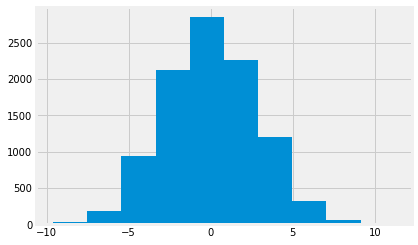

In [24]:
fake_differences = np.zeros(10000)
for i in np.arange(10000):
    # Shuffle
    np.random.shuffle(pooled)
    # Split
    fake_beer = pooled[:n_beer]
    fake_water = pooled[n_beer:]
    # Recalculate mean difference
    fake_diff = np.mean(fake_beer) - np.mean(fake_water)
    # Store mean difference
    fake_differences[i] = fake_diff
plt.hist(fake_differences);

We are interested to know just how unusual it is to get a difference as big as we actually see, in these many samples of differences we expect by chance, from random sampling.

To do this we calculate how many of the fake differences we generated are equal to or greater than the difference we observe:

In [25]:
n_ge_actual = np.count_nonzero(fake_differences >= observed_difference)
n_ge_actual

595

That means that the chance of any one difference being greater than the one we observe is:

In [26]:
p_ge_actual = n_ge_actual / 10000
p_ge_actual

0.0595

This is also an estimate of the probability we would see a difference as large as the one we observe, if we were taking random samples from a matching population.